# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

# Busiess Goal :

Used car market in United states is quite significant. The market was valued at USD 195.84 billion in 2021, and it is projected to reach USD 302.47 billion by 2027. Now as a dominant data analytics company, we plan on providing services to the car delears that will empower them with the capability of determining the car price and provide the best deals to our customers !!

Based on the features of the car, we plan on using linear regression modeling to evaluate the price of the car. In order to evaluate the accurate car pricing, we dive deep into various features of the car. We have deviced a model that provides the fairly accurate car pricing once requested features are fed. This model was developed based on large data set of cars sold in the past. We use various techiques like PCA, Sequential feature selection and the linear regression techniuqes like Lasso regressions (based on L1 regularization)
that provide fairly accurate price of the car based on the features

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Data Understanding :
As mentioned earlier, we are using a huge database to evaluate the parameters that influcence the car price.

**Target** :
As the primary aim of our target is to find the price of the car, PRICE OF THE CAR becomes the primary target variable.


**Dependent Variables** :
The database provides parameters like (1) Year of Production, (2) Make (3) Model (4) Condition (5) cylinders (6) fuel efficincy (7) odometer (8) title_status (9) transmission (10) VIN (11) Drive (12) Size (13) Type (14) paint color (15) State (16) Region

Before using this database (0.426 million lines of data distributed among the 18 features), we will evaluate the aunthicity and nature of the data. So we will be using many graphical plotting techniques to understand the nature of the data. I have taken following steps

**Step 1 :** Read data in .csv format and find out the various variable types



In [69]:
## In order to analyze data, we include following libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Reading the data and listing the various features here
df = pd.read_csv("/content/drive/MyDrive/Colab/data/vehicles.csv", low_memory=False)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl


**Step 2 (Feature Engineering) :**
Categorize the PRICE data into # segments; This steps helps in understanding and avoiding any outliers so that the linear regression fits well for the maximum number of data points.

**Conclusion** :
96.5 % of the cars in the database are below the price of 50K so the linear regression will work well within this price range

In [72]:
## Find out the min, max and unique values of some of the important columns
print ("Price data, Odometer Data, Year data\n")
num_columns = ['price', 'year', 'odometer']

print (df[num_columns].describe())

Price data, Odometer Data, Year data

              price           year      odometer
count  4.268800e+05  425675.000000  4.224800e+05
mean   7.519903e+04    2011.235191  9.804333e+04
std    1.218228e+07       9.452120  2.138815e+05
min    0.000000e+00    1900.000000  0.000000e+00
25%    5.900000e+03    2008.000000  3.770400e+04
50%    1.395000e+04    2013.000000  8.554800e+04
75%    2.648575e+04    2017.000000  1.335425e+05
max    3.736929e+09    2022.000000  1.000000e+07


Number of cars with zero value  32895
Number of cars with value > 250K  95
Number of cars with value > 100K  655
subp
Low<50K         96.969640
Medium>50K       2.876921
High>100K        0.131184
Premium>250K     0.022254
Name: proportion, dtype: float64


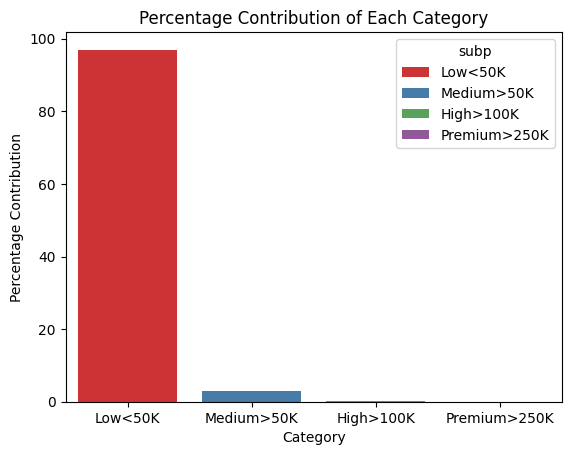

In [73]:
## From the above data, it is clear that we need to clean more from this data
## Price Column : Remove the price of the car rows with 0, check how many cars have value > 250K

print ("Number of cars with zero value ", (df['price']==0).sum())
print ("Number of cars with value > 250K ", (df['price']>250000).sum())
print ("Number of cars with value > 100K ", (df['price']>100000).sum())

## Remove the price of the car = 0 rows
df = df.reset_index(drop=True)

## For better analysis of the data, create sub-price category
df['subp'] = df['price'].apply(lambda x: 'Premium>250K' if x > 250000 else 'High>100K' if x > 100000 else 'Medium>50K' if x > 50000 else 'Low<50K')

#print (df.head(3))

# Calculate the percentage contribution for each category
percentage_contribution = df['subp'].value_counts(normalize=True) * 100
print(percentage_contribution)
sns.barplot(x=percentage_contribution.index, y=percentage_contribution.values, hue=percentage_contribution.index, palette='Set1', legend=True)
plt.xlabel("Category")
plt.ylabel("Percentage Contribution")
plt.title("Percentage Contribution of Each Category")
plt.show()

**Step 3** :
**Visualize** the make and their avergae pricing

**Conclusion** : Average price of vehicles depends on the make of the car and as shown in the graph, the values vary from make to make

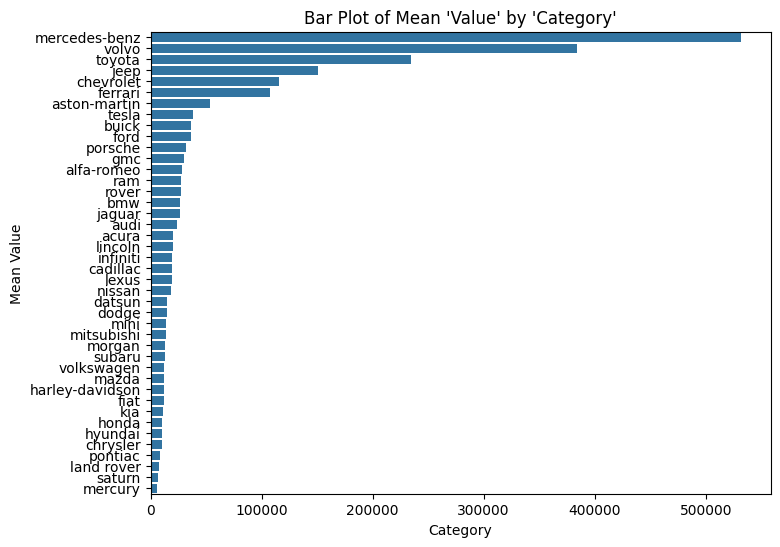

In [74]:
## Plot the avg price of the car vs these features in acending
# Calculate the mean of 'Value' for each category
grouped_mean = df.groupby('manufacturer')['price'].mean()
# Sort the data in ascending order of the mean value
grouped_mean_sorted = grouped_mean.sort_values(ascending=False)

# Visualize the distribution of 'Value' for each category using a box plot
# Plot a bar plot to visualize the average 'Value' for each category
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_mean_sorted.values, y=grouped_mean_sorted.index)
plt.title("Bar Plot of Mean 'Value' by 'Category'")
plt.xlabel("Category")
plt.ylabel("Mean Value")
plt.show()

**Step 4** :
Evaluate the density and span of the dependent variables; This step helps in also getting rid of the outliers; It also helps in fixing the data if there are unrealistic and corrupt data points in the database

**Conclusion (from following graphs)**

(1) Most of the cars present in the database are reported to have manufactured between 1995 to 2021

(2) Most of the cars in excellant and good conditions

(3) Most of the cars have "clean" title status

(4) Most of the cars have 4, 6, 8 cyclinders

(5) Most of the cars are Full size &  Mid-Size cars

(6) Most of the cars have odomoeter range from 0 to 250K miles

(7) Most of the cars are gas based fuel cars



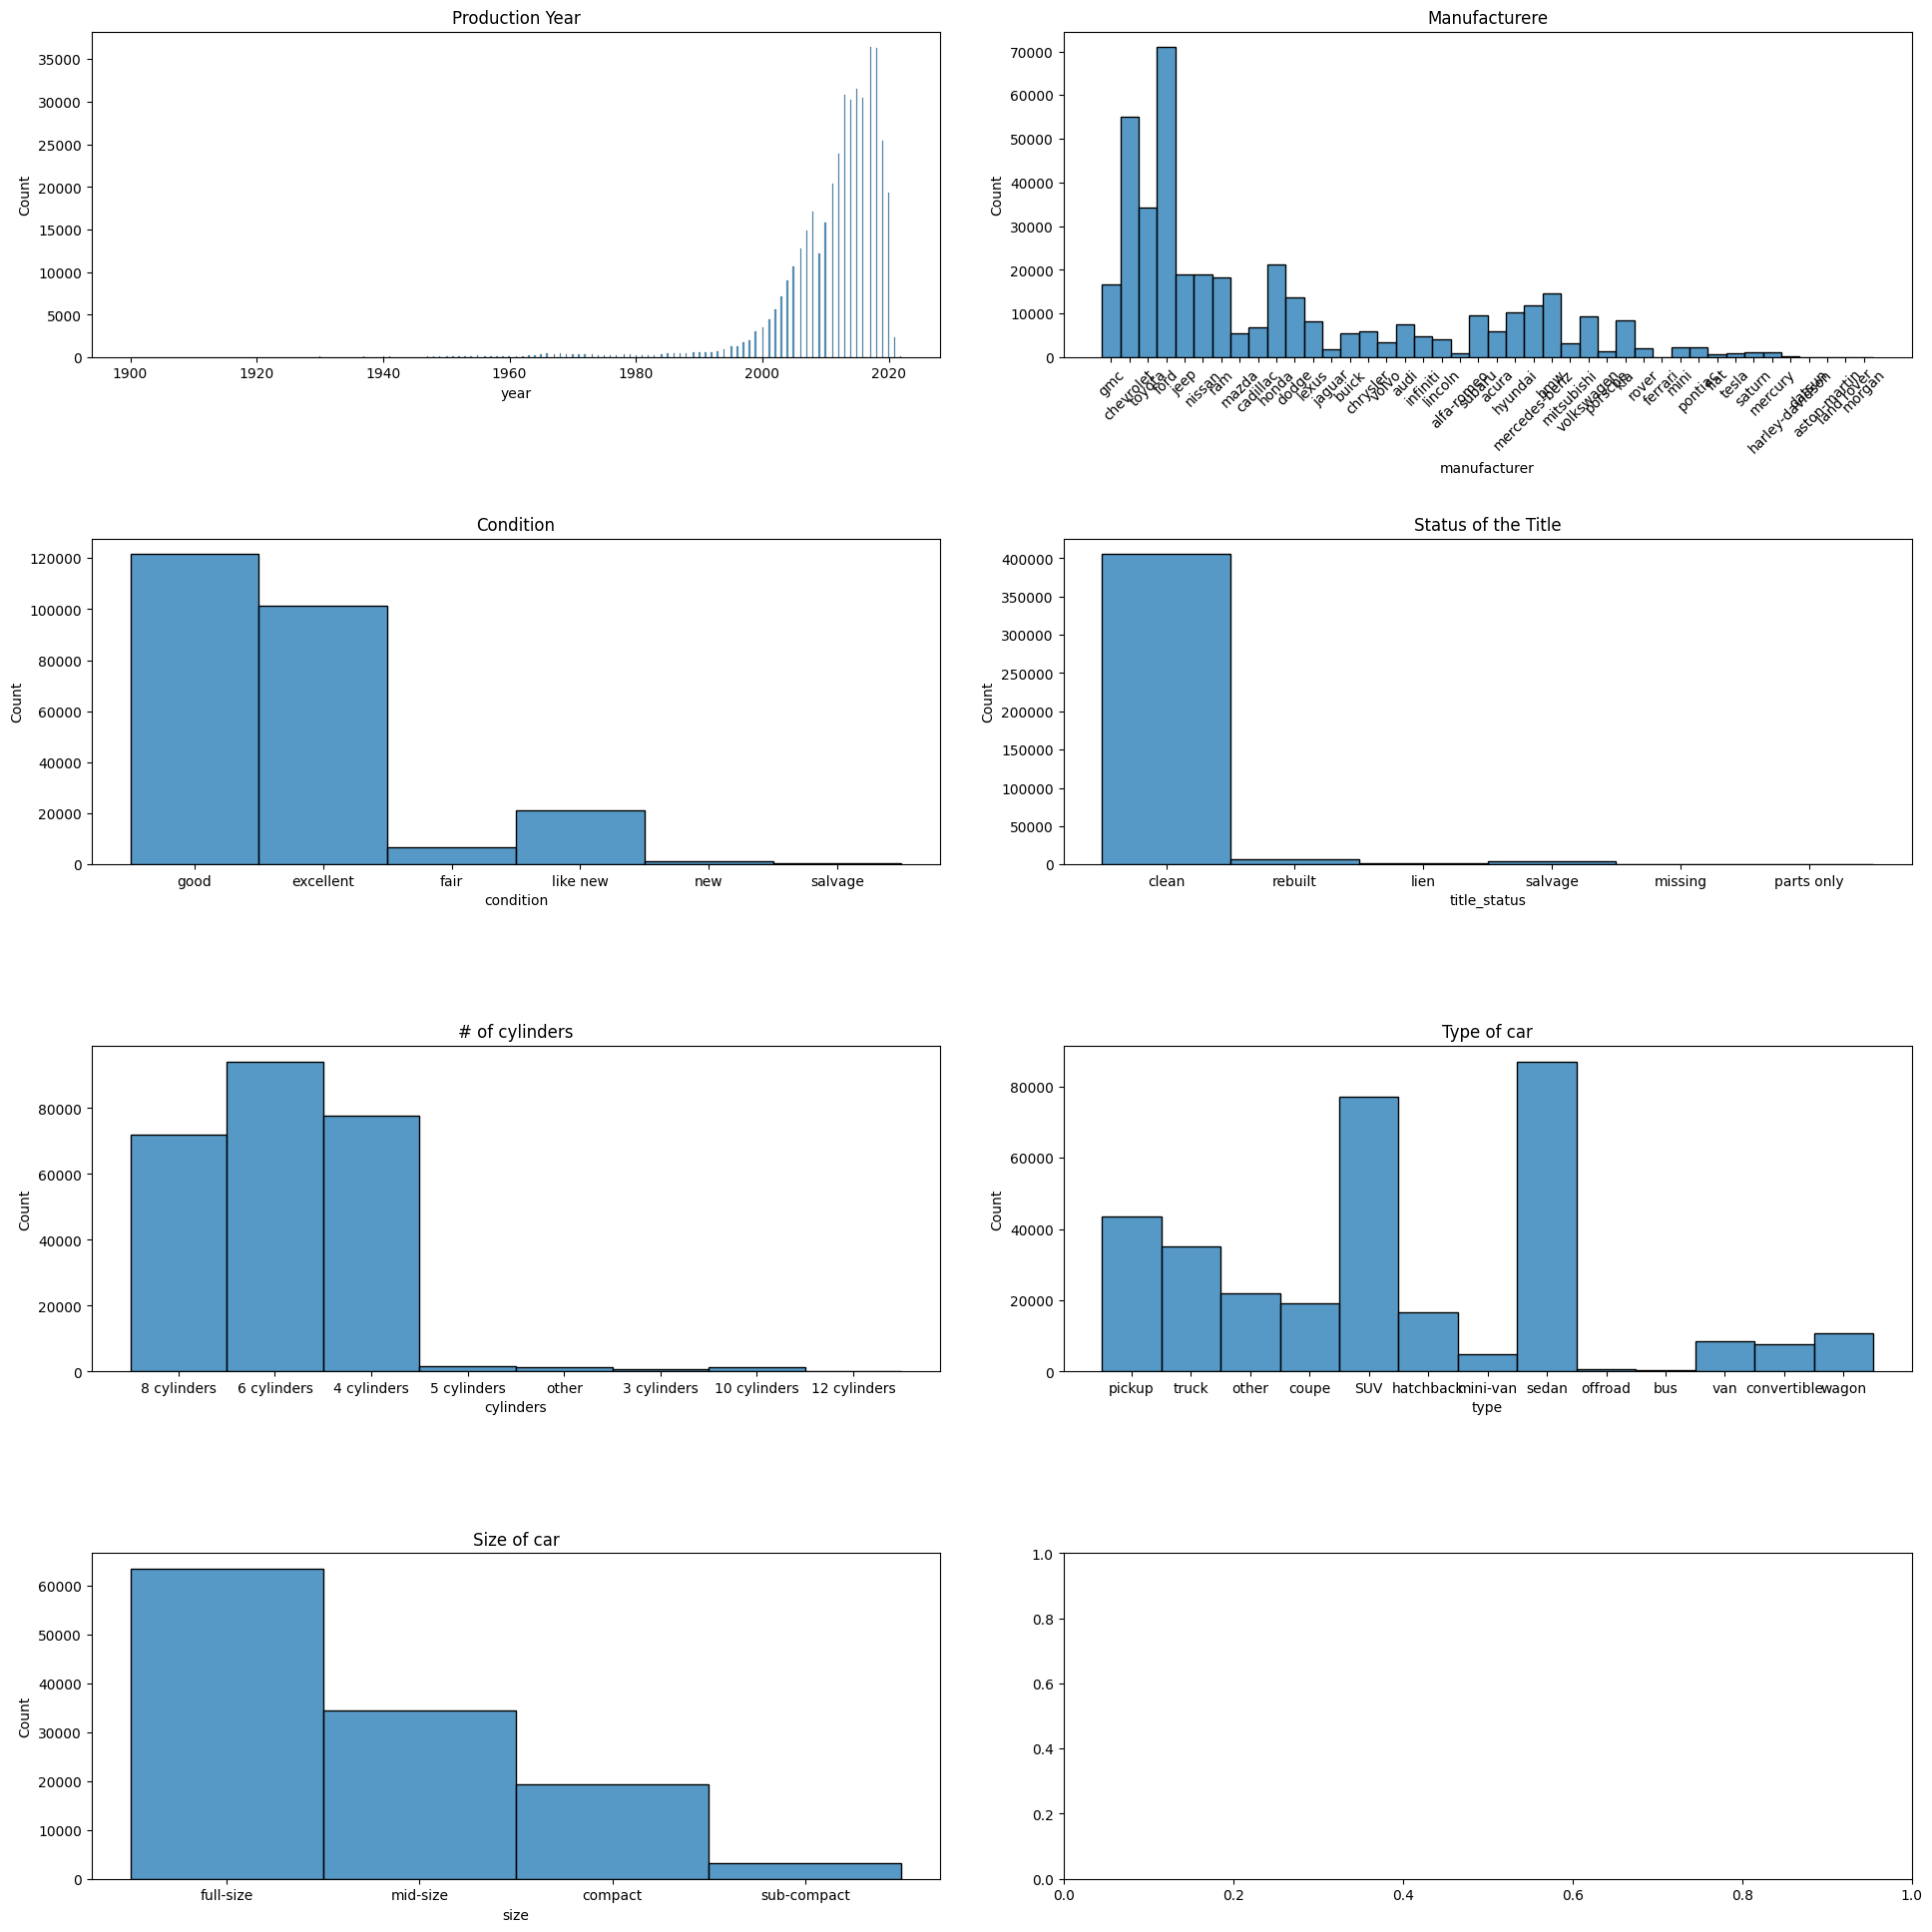

In [75]:
KDE_S=False

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
# Plot histograms on the subplots
sns.histplot(df['year'], kde=KDE_S, ax=axes[0, 0])
axes[0, 0].set_title("Production Year")

sns.histplot(df['manufacturer'], kde=KDE_S, ax=axes[0, 1])
# Change X label direction on the second subplot
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_title("Manufacturere")

sns.histplot(df['condition'], kde=KDE_S, ax=axes[1, 0])
axes[1, 0].set_title("Condition")

sns.histplot(df['title_status'], kde=KDE_S, ax=axes[1, 1])
axes[1, 1].set_title("Status of the Title")

sns.histplot(df['cylinders'], kde=KDE_S, ax=axes[2, 0])
axes[2, 0].set_title("# of cylinders")

sns.histplot(df['type'], kde=KDE_S, ax=axes[2, 1])
axes[2, 1].set_title("Type of car")

sns.histplot(df['size'], kde=KDE_S, ax=axes[3, 0])
axes[3, 0].set_title("Size of car")

# Use tight_layout to adjust spacing
plt.tight_layout(pad=3.0)  # Increase the padding for more space

# Display the plot
plt.show()

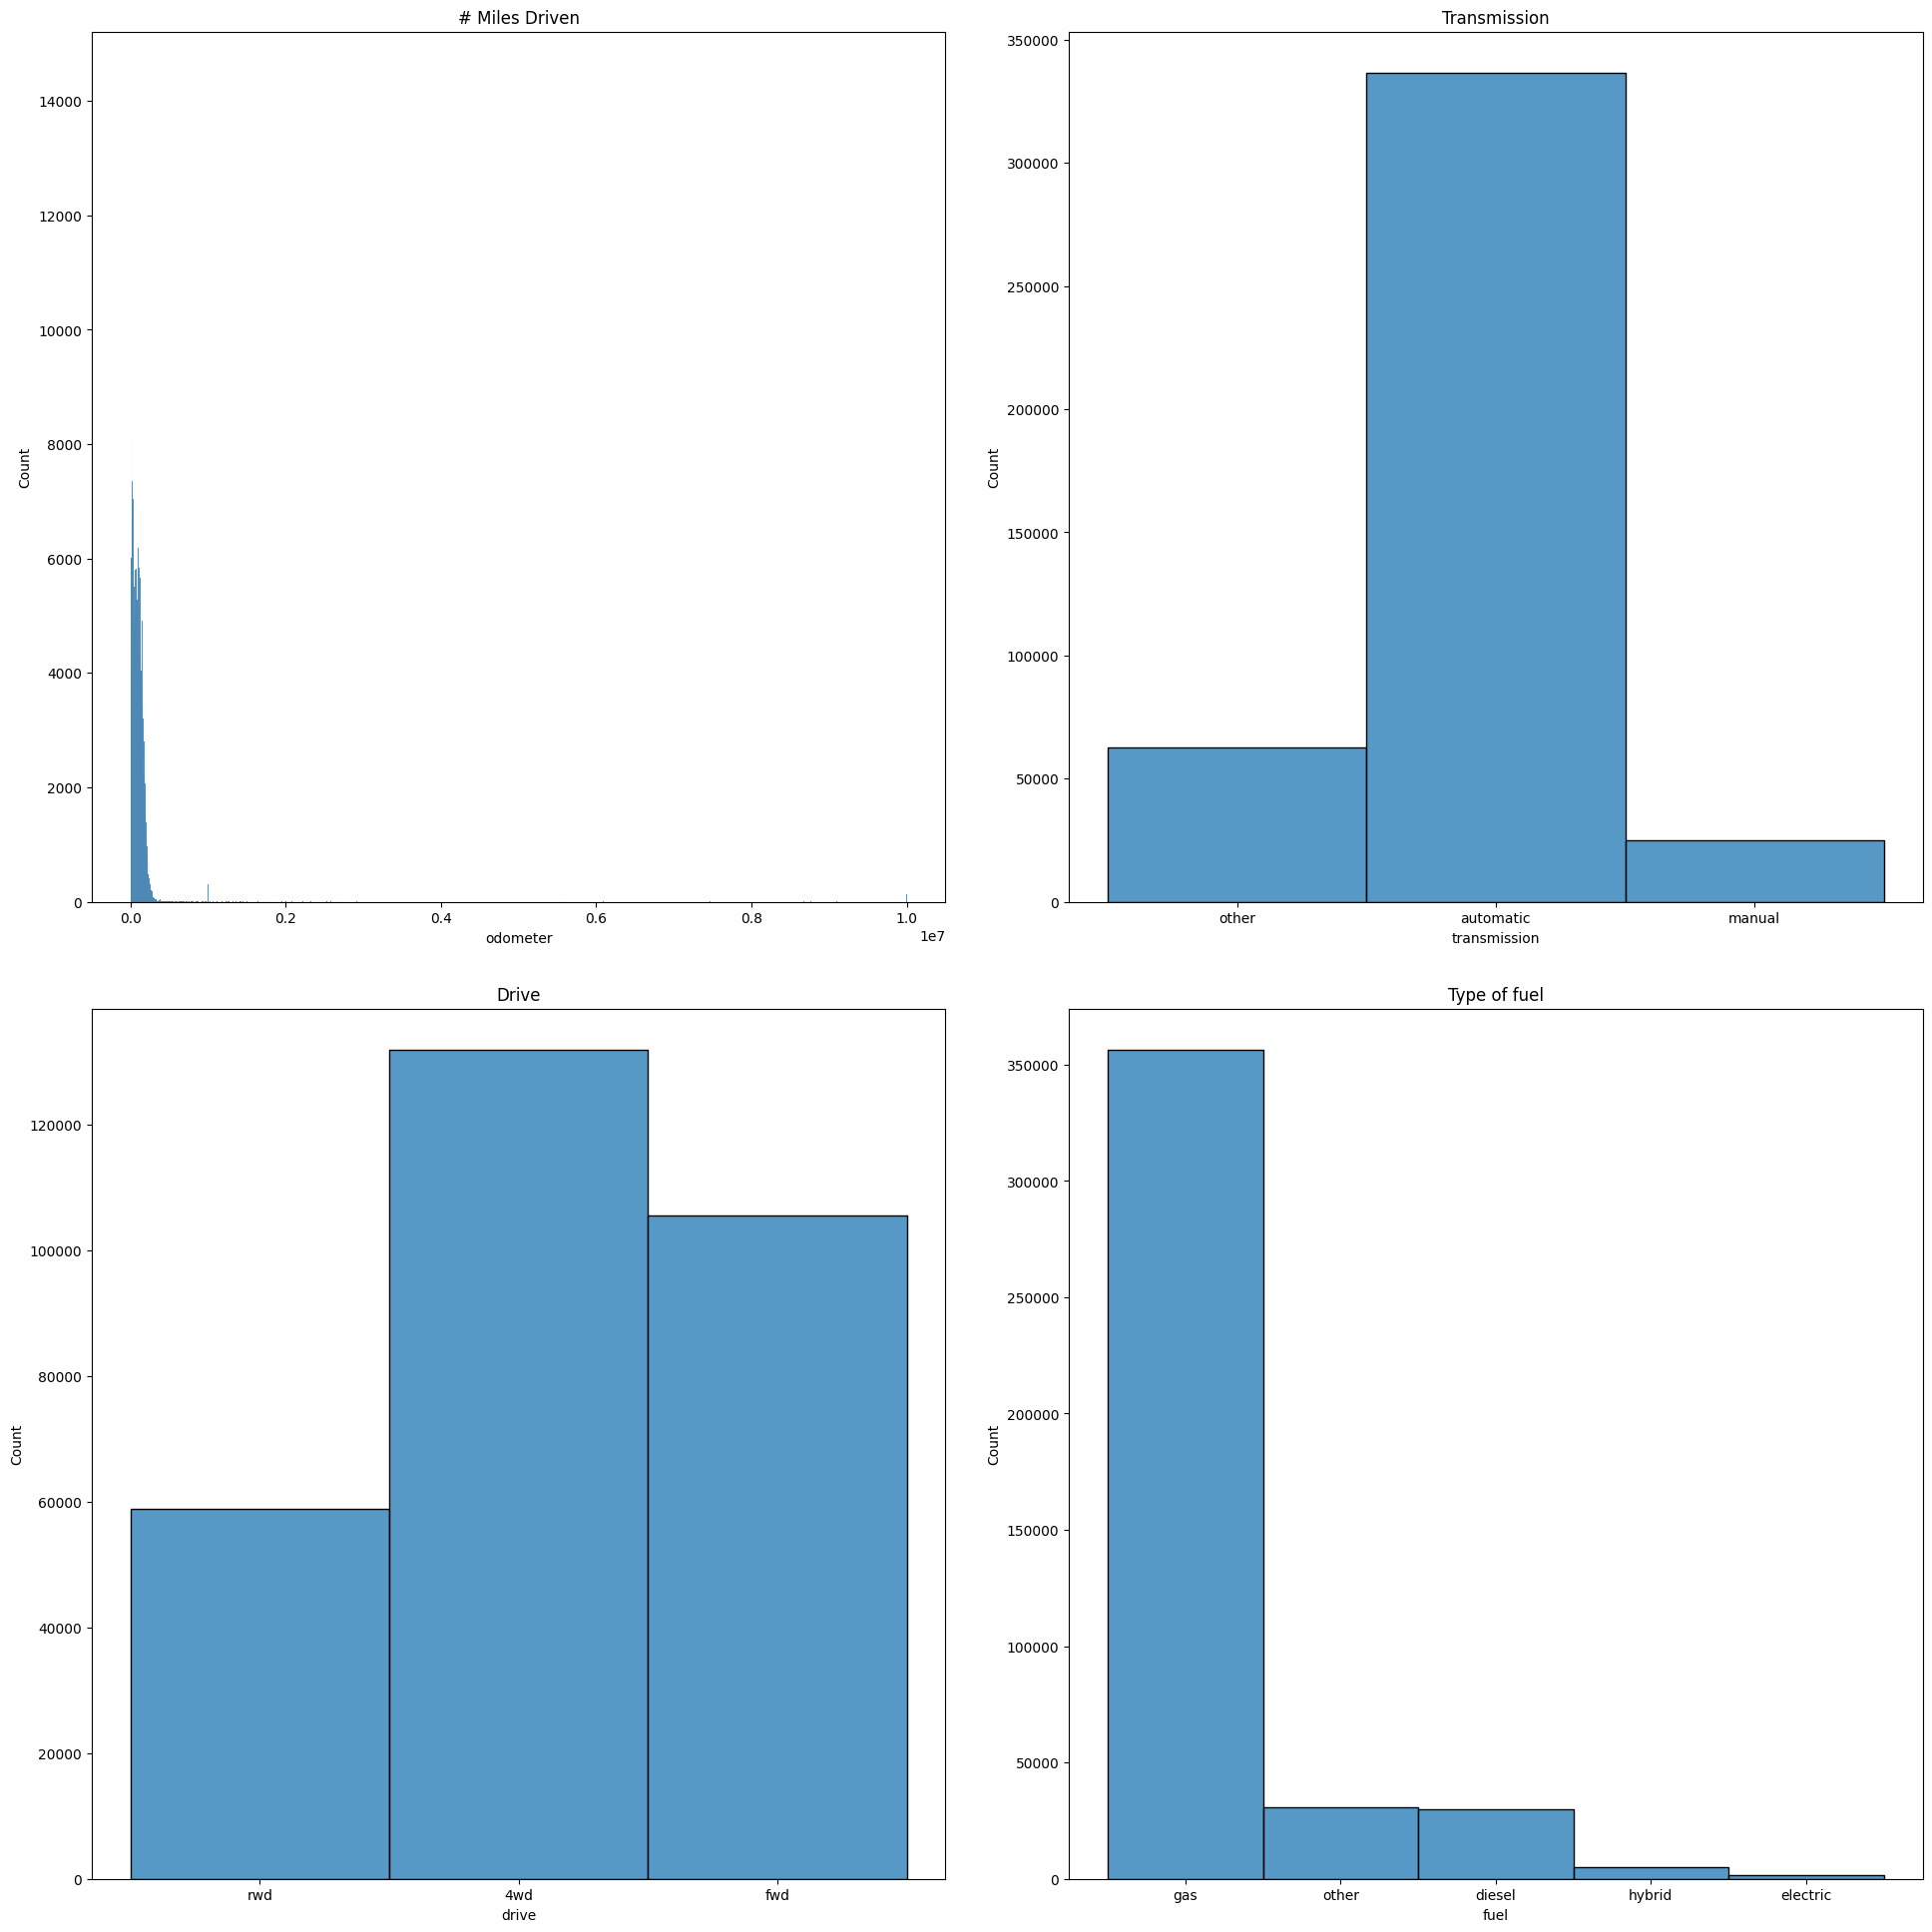

In [76]:
## 2nd set of important features
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

sns.histplot(df['odometer'], kde=KDE_S, ax=axes[0, 0])
axes[0, 0].set_title("# Miles Driven")
sns.histplot(df['transmission'], kde=KDE_S, ax=axes[0, 1])
axes[0, 1].set_title("Transmission")
sns.histplot(df['drive'], kde=KDE_S, ax=axes[1, 0])
axes[1, 0].set_title("Drive")
sns.histplot(df['fuel'], kde=KDE_S, ax=axes[1, 1])
axes[1, 1].set_title("Type of fuel")

# Use tight_layout to adjust spacing
plt.tight_layout(pad=3.0)  # Increase the padding for more space

# Display the plot
plt.show()


**Step 5** :

Evaluate the association of price with the various parameters using scatter and violin plots

**Conclusion** :

(1) Price Vs Year for different fuel types

*   Bad data info : There are cars that have zero value
*   Good data info : Price of the car is directly proportional to age of the car
*   Good data info : Cost of diesel cars is typicaly higher than gas based cars

(2) Price Vs Odometer for different drive

*   Good info : Price of the cars that are new and 4Wheel drive
*   Bad Data info : Price of very old rear wheel drive cars is higher and that does not seems to be a good data

(3) Price vs Transmission for different cylinder types

*   Most of the automatic tranmission cars have 6, 8 and 10 cylinders; The cost of cars > 10000 are more in number than the < 1000  
*   Most of the manual cars have all type of cyclinders

(4) Price vs Condition for different title status

*   Bigger bulb size at the top indicates that good, excellant cars are costly and more in numbers.
*   Bad data info : Conditions does not correlate with the Title Status;


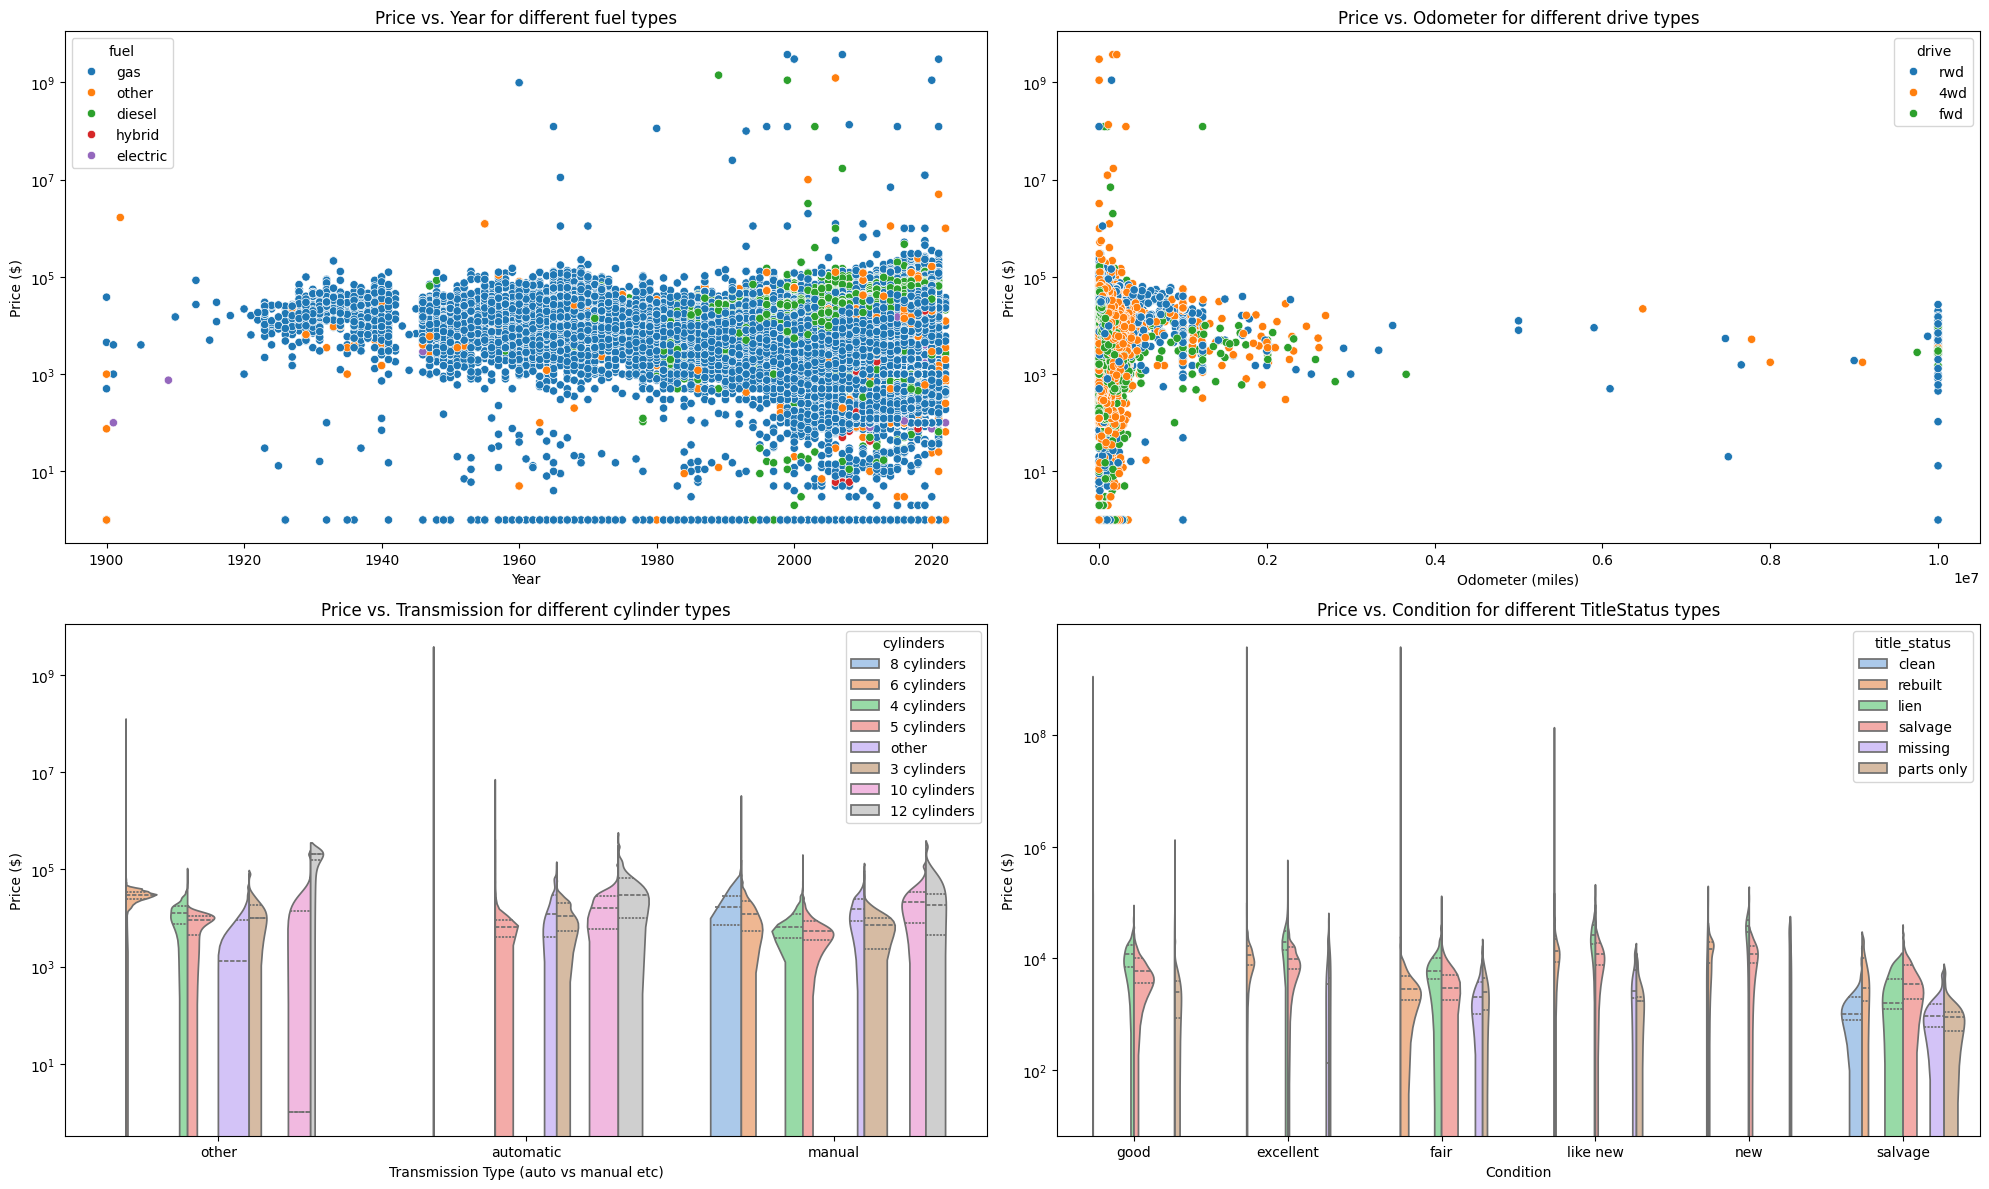

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))

# Define custom colors
custom_colors = ['#FF5733', '#33FF57', '#3357FF']

# Scatter plot for 'price' vs 'year'
plt.subplot(221)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='year', y='price', hue='fuel', data=df)  # Color by group with custom palette
plt.title('Price vs. Year for different fuel types')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.yscale('log')

# Scatter plot for 'price' vs 'odometer'
plt.subplot(222)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='odometer', y='price', hue='drive', data=df)  # Color by group with custom palette
plt.title('Price vs. Odometer for different drive types')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.yscale('log')

# Scatter plot for 'price' vs 'odometer'
plt.subplot(223)  # 2 row, 2 columns, 2nd subplot
#sns.scatterplot(x='transmission', y='price', hue='cylinders', data=df)  # Color by group with custom palette
sns.violinplot(x='transmission', y='price', hue='cylinders', data=df, split=True, inner='quartile', palette='pastel')
plt.title('Price vs. Transmission for different cylinder types')
plt.xlabel('Transmission Type (auto vs manual etc)')
plt.ylabel('Price ($)')
plt.yscale('log')

# Scatter plot for 'price' vs 'odometer'
plt.subplot(224)  # 2 row, 2 columns, 2nd subplot
#sns.scatterplot(x='condition', y='price', hue='title_status', data=df)  # Color by group with custom palette
sns.violinplot(x='condition', y='price', hue='title_status', data=df, split=True, inner='quartile', palette='pastel')
plt.title('Price vs. Condition for different TitleStatus types')
plt.xlabel('Condition')
plt.ylabel('Price ($)')
plt.yscale('log')

plt.tight_layout()
plt.show()

**Step 6**

Evaluate correlation of price with the type, size, fuel, transmission and drive using correlation matrix

**Conclusion**

Price of the car is linked to the manual transmission, 4WD, pickup type, mid size, diesel type cars and full size cars

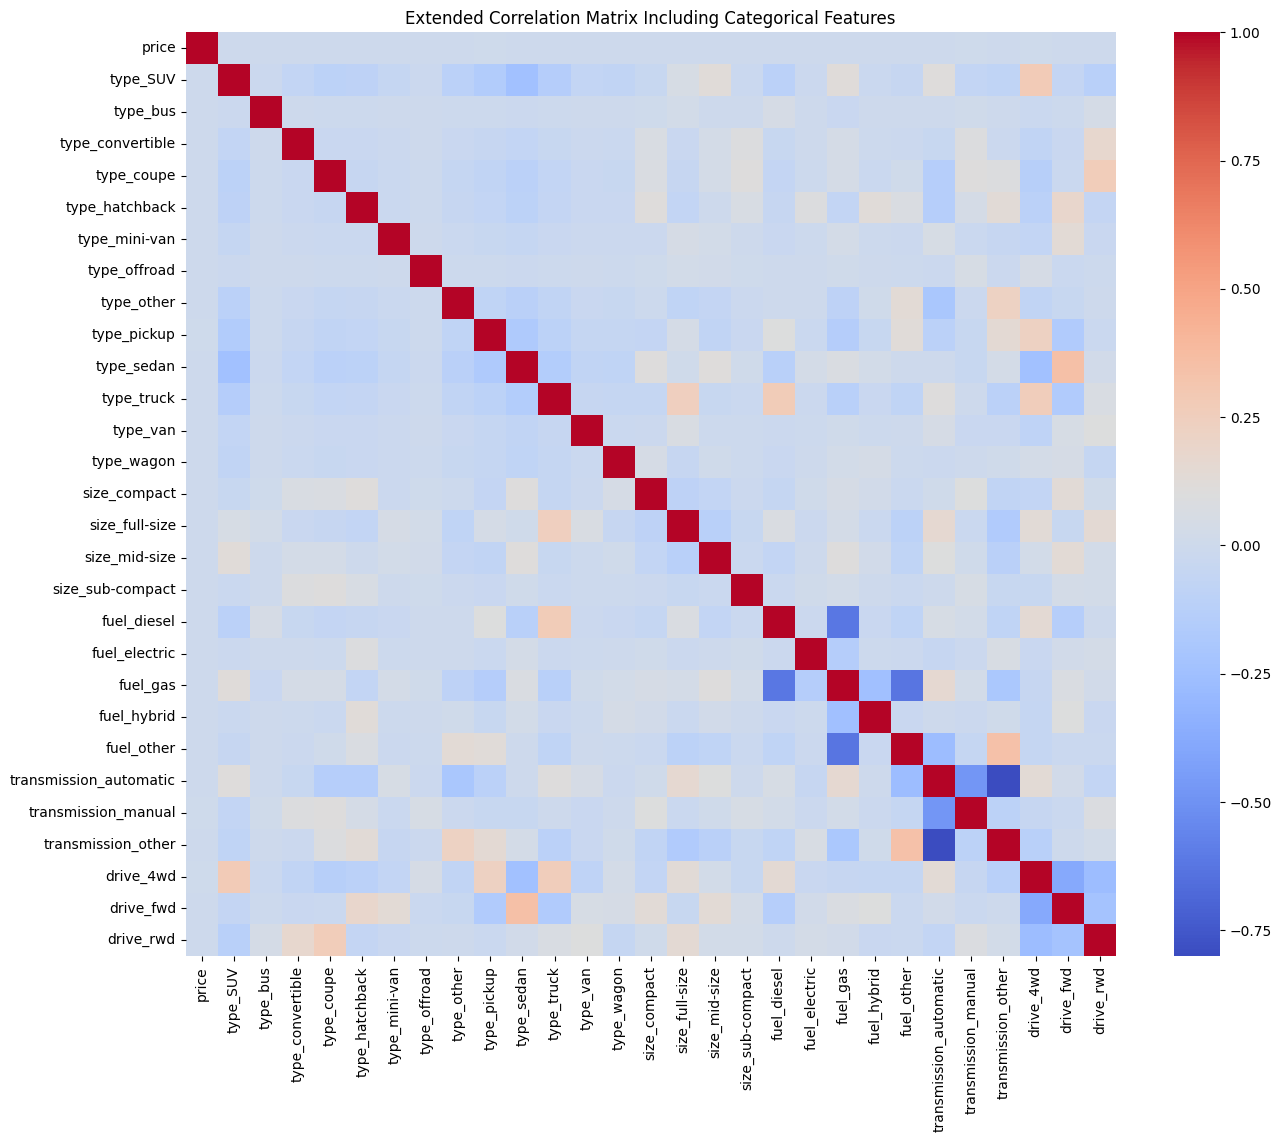

price                     1.000000
transmission_manual       0.002529
drive_4wd                 0.002022
type_pickup               0.001923
size_mid-size             0.001091
fuel_diesel               0.000971
size_full-size            0.000822
transmission_automatic   -0.000050
type_bus                 -0.000175
type_offroad             -0.000184
fuel_other               -0.000192
fuel_gas                 -0.000239
fuel_electric            -0.000262
size_sub-compact         -0.000449
fuel_hybrid              -0.000551
type_mini-van            -0.000579
type_convertible         -0.000615
type_van                 -0.000677
type_wagon               -0.000817
type_coupe               -0.000949
type_other               -0.000968
type_hatchback           -0.001004
size_compact             -0.001033
type_truck               -0.001129
drive_rwd                -0.001130
transmission_other       -0.001539
type_SUV                 -0.001573
type_sedan               -0.002462
drive_fwd           

In [78]:
## Plot the avg price of the car vs these features in acending
# Selecting categorical variables for encoding
categorical_features = ['type', 'size', 'fuel', 'transmission', 'drive']

# Encoding the selected categorical variables using get_dummies (One-Hot Encoding)
encoded_features = pd.get_dummies(df[categorical_features])

# Combining the encoded categorical features with the numerical features selected earlier
combined_features = pd.concat([df['price'], encoded_features], axis=1)

# Computing the correlation matrix for the combined feature set
extended_correlation_matrix = combined_features.corr()

# Visualizing the extended correlation matrix using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(extended_correlation_matrix, cmap='coolwarm', fmt=".1f")
plt.title('Extended Correlation Matrix Including Categorical Features')
plt.show()

# Output the correlation values with the price specifically
price_correlations = extended_correlation_matrix['price'].sort_values(ascending=False)
price_correlations

In [79]:

df=df.drop(columns=['subp'])

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

**Data Preparation for the training and testing**

We prepare data using following steps ⁉

**(1)** Evaluate the bad data by checking NaN values in various columns ;
    Please see followoing for %age of NaNs in each column.
    It can be concluded that "**Size**" contributes worst for bad data;
    So deciding to remove this column from the final dataset

**(2)** Remove **ID** and **VIN** as they contribute to final price of the car

**(3)** I suspect the model is a good paramatere but as we need to convert this into one-hot encoded columns, it can lead to "CURSE OF DIAMENSIONALITY"; So dropping this data

**(4)** Filling up the NaNs in the Type column with the Model information ofthe car.

**(5)** State and Region columns are also dropped to maintain the diamensionality of the final database

**(6)** Paint type also is corrupt and consumes more than 30 % NaNs so remove it from final db.

In [80]:
## Find out if there are any NaN columns so that we can clean up the data
# Step 1: Count the number of NaNs
nan_count = df.isna().sum().sum()
print("Total number of rows in data set:", df.shape[0], "\n")
print("Number of NaNs in the dataset:", nan_count)
print ("\n")
# Find columns with NaN values
columns_with_nan = df.columns[df.isna().any()].tolist()
# Evaluate the percentage of missing values in each column
nan_data = df.isnull().mean() * 100
# Display the percentage of missing values for each column
print ("% of NaN's in each column \n")
print (nan_data)

Total number of rows in data set: 426880 

Number of NaNs in the dataset: 1215152


% of NaN's in each column 

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


**Data Cleaning **

Many columns have outliers and it is required to limit the dataset into a right portion where linear regressions can stabilize with reasonable amont of RMSE

Fitering many such columns here for **outlier values **

You see that almost 18 % of data is gone with outlier value filtering

When the final NaN filter is applied, we see only 30 % of original data being used for training and testing

Is it Good?

Main aim of the activity is to create a linaer regression model. If such model can be constructed with higher accuracy with lower portion of data, then that is OK.



In [81]:
## Check if all zero mile cars are new? Or the data is junk?

df=df[(df['odometer']<250000) | (df['odometer']>50)]

print("Number of rows after removing Odometer ranges = ", df.shape[0])
print("Cleaned # of rows due to bad odometer ranges = ",  round((df.shape[0]/426879)*100, 2))

## Also get rid of very high priced cars

df=df[(df['price']<50000) & (df['price']>500)]
print("Number of rows after cleaning price range = ", df.shape[0])
print("Cleaned # of rows due to bad price ranges = ",  round((df.shape[0]/426879)*100, 2))

## Production year only post 1990
df=df[(df['year']>1995)]

print("Number of rows after cleaning min year range = ", df.shape[0])
print("Cleaned # of rows due to bad year range = ",  round((df.shape[0]/426879)*100, 2))

## Get rid of cars with different cylinders
#df=df[(df['cylinders']=='8 cylinders') | (df['cylinders']=='6 cylinders') | (df['cylinders']=='4 cylinders') | (df['cylinders']=='5 cylinders') | (df['cylinders']=='10 cylinders') | (df['cylinders']=='other')]
df=df[(df['cylinders']!='other')]
df=df[(df['cylinders']!='12 cylinders')]

print("Number of rows after cleaning # of cylinders = ", df.shape[0])
print("Cleaned # of rows due to bad # of cylinders = ",  round((df.shape[0]/426879)*100, 2))

#df=df[(df['condition']!='salvage')]
#df=df[(df['condition']!='new')]

#print("Number of rows after cleaning conditions = ", df.shape[0])
#print("Cleaned # of rows due to bad conditions = ",  round((df.shape[0]/426879)*100, 2))

#df=df[(df['title_status']!='missing')]
#df=df[(df['title_status']!='parts only')]

#print("Number of rows after cleaning title status = ", df.shape[0])
#print("Cleaned # of rows due to bad title status = ",  round((df.shape[0]/426879)*100, 2))

# Get unique types
unique_types = df['type'].unique()
# Iterate over each unique type
for type_val in unique_types:
    # Get distinct truck models for the current type
    models = df[df['type'] == type_val]['model'].unique()
    #print (models)
    # Update type to truck for rows where model matches and type is NaN
    df.loc[df['model'].isin(models) & df['type'].isna(), 'type'] = type_val

## Get rid of those old dfs
#df=df[(df['type']!='offroad')]
#df=df[(df['type']!='bus')]

## Get rid of bad titles
#df=df[(df['title_status']!='parts only') | (df['title_status']!='lien') | (df['title_status']!='missing')]
print("Number of rows in new dataframe = ", df.shape[0])
print("Cleaned # of rows due to bad ranges of type = ",  round((df.shape[0]/426879)*100, 2))

Number of rows after removing Odometer ranges =  422480
Cleaned # of rows due to bad odometer ranges =  98.97
Number of rows after cleaning price range =  368715
Cleaned # of rows due to bad price ranges =  86.37
Number of rows after cleaning min year range =  352062
Cleaned # of rows due to bad year range =  82.47
Number of rows after cleaning # of cylinders =  351170
Cleaned # of rows due to bad # of cylinders =  82.26
Number of rows in new dataframe =  351170
Cleaned # of rows due to bad ranges of type =  82.26


In [82]:
# Data Preprocessing

df=df.drop(columns=['id', 'VIN', 'size', 'model', 'region', 'state', 'paint_color'], axis=1)

#df['condition'].fillna("good", inplace=True)
#df['cylinders'].fillna("4 cylinders", inplace=True)
df.dropna(inplace=True)

print ("Ratio of the clean data vs original data = ", round((df.shape[0]/426879)*100, 2))

Ratio of the clean data vs original data =  29.01


**Data Encoding**

Once the data is ready, all categorical features are converted into multiple columns using one-hot encoding

After doing one-hot encoding, the total number of columns = 78

For diamensionality reduction, we will use PCA and try to compress all the data into just 10 columns. However there would be some loss of data (as effective variance captured by PCA is 75 %). But we will try to run it through the linear regression later to evaluate if that leads to better RMSE



In [83]:
from sklearn.preprocessing import LabelEncoder

## Preparing the data with one-hot encoding
#df_encoded = pd.get_dummies(df, columns=['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type','paint_color', 'state', 'region'])
oenc_cols = ['manufacturer', 'condition','title_status', 'cylinders', 'fuel', 'transmission', 'drive', 'type']
df_encoded = pd.get_dummies(df, columns=oenc_cols)

# Instantiate a LabelEncoder
#label_encoder = LabelEncoder()

#df_encoded['model'] = label_encoder.fit_transform(df_encoded['model'])
#df_encoded['state'] = label_encoder.fit_transform(df_encoded['state'])
#df_encoded['region'] = label_encoder.fit_transform(df_encoded['region'])

# All new columns created by get_dummies
new_columns = df_encoded.columns

# Create a dictionary to count the number of dummy columns added for each original column
dummy_column_count = {col: 0 for col in oenc_cols}

# Count the dummy columns that correspond to each original column
for col in df_encoded.columns:
    # Check if the column starts with one of the original categorical column names
    for original in oenc_cols:
        if col.startswith(original):
            dummy_column_count[original] += 1

print("Count of columns added for each original categorical column:")
print(dummy_column_count)

print ("Number of columns in new dataframe = ", df_encoded.shape[1])
#df_encoded = df_encoded.astype(int)
print (df_encoded.head(3))

# Separate features and target variable (if applicable)
X = df_encoded.drop(columns=['price'], axis=1)  # Drop target column if present
y = df_encoded['price']  # Extract target column if present

X = X.astype(int)

#print (y.describe())

Count of columns added for each original categorical column:
{'manufacturer': 38, 'condition': 6, 'title_status': 6, 'cylinders': 6, 'fuel': 5, 'transmission': 3, 'drive': 3, 'type': 13}
Number of columns in new dataframe =  83
    price    year  odometer  manufacturer_acura  manufacturer_alfa-romeo  \
31  15000  2013.0  128000.0               False                    False   
32  27990  2012.0   68696.0               False                    False   
33  34590  2016.0   29499.0               False                    False   

    manufacturer_aston-martin  manufacturer_audi  manufacturer_bmw  \
31                      False              False             False   
32                      False              False             False   
33                      False              False             False   

    manufacturer_buick  manufacturer_cadillac  ...  type_coupe  \
31               False                  False  ...       False   
32               False                  False  ...    

In [84]:
## Then scaling the data (scaling will work only for )
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = pd.DataFrame()
X_scaled = X.copy(deep=True)

columns_to_scale = ['odometer', 'year']

# Scale the features
scaler = StandardScaler()
X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale])

#print (X_scaled.head(3))
#print ("Sum of column elements = ", X_scaled['paint_color_custom'].value_counts())

# Step 1: Perform PCA
n_components = 10
# Initialize PCA object with desired number of components
pca = PCA(n_components=n_components)  # Example: Reduce to 2 principal components
# Generate column names for PCA components
pca_component_names = [f"PC{i+1}" for i in range(n_components)]

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=pca_component_names)

# Get the loadings
#loadings = pd.DataFrame(pca.components_, columns=X_scaled.columns)
#print("PCA Loadings:")
#print(loadings)

#print("Encoded = ", df_encoded.shape)

# Get the explained variance ratio
explained_variance = pca.explained_variance_  # Shows the raw variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance & Ratio:", explained_variance, explained_variance_ratio)
print ("Sum of PCA Contributions ", explained_variance_ratio.sum())
print (pca_df.head(3))


Explained Variance & Ratio: [1.38330209 0.66655076 0.64674534 0.48060901 0.3853638  0.30050117
 0.19576981 0.19117254 0.16704824 0.14967445] [0.22177886 0.10686521 0.10368989 0.07705397 0.06178372 0.04817806
 0.03138693 0.03064987 0.02678212 0.02399666]
Sum of PCA Contributions  0.7321652909241019
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.092863  0.176020  0.259566 -0.425019 -0.028706  1.403347 -0.233631   
1 -0.559106 -0.527510  1.250436  0.575212  0.439403 -0.589677  0.181053   
2 -1.355288 -0.182042  1.167097  0.681216 -0.567798 -0.192124  0.093168   

        PC8       PC9      PC10  
0 -0.455999  0.770457  0.101968  
1  0.947483 -0.087196 -0.061301  
2  0.914090 -0.357394 -0.220073  


**Data Splitting for Training and Testing**

Once the data is ready, it is split into 80 % (training) and 20 % testing using SKLEARN train_test_split API as follows


In [85]:
from sklearn.model_selection import train_test_split

# Simple data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
# Split the PCA Output
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(pca_df, y, test_size=0.3, random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**Linear Regression Modeling**

In order to predict the price of the car with min MSE and RMSE, following models are tried

**(1) Pipeline 1 :** PolymonialFeature Changes from degree 1->2, Scaler and simple Linear function

Gridsearch is carried out for degree variable for 1st and 2nd degree

**(2) Pipeline 2 :** In this pipeline, instead of Linear regression, Lasso based linear regression model is used to improve the regularization

During these runes, Gridsearch is applied for aplha value of 10 and 100

**(3) PCA output** is fed to linear regressions

Plan is to select the topology that provides best MSE and RMSE values for prediction.




In [87]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Simple Linear Regression with polynomial changes with grid
# Create a pipeline with PolynomialFeatures and Linear Regression
pipeline1 = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),  # Polynomial transformation
    ('scaler', StandardScaler()),  # Scaling
    ('linear_regression', LinearRegression())  # Linear regression
])

# Define a grid of hyperparameters for tuning
param_grid1 = { 'poly_features__degree': [1,2]}

# Set up GridSearchCV to find the best alpha
grid_search = GridSearchCV(pipeline1, param_grid1, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)  # Cross-validation
grid_search.fit(X_train, y_train)  # Fit the GridSearchCV

# Find the best model and evaluate
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_linear = best_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Calculate the squared errors for each point
squared_errors_linear = (y_test - y_pred_linear) ** 2
# Calculate the RMSE for each point
point_rmse_linear = np.sqrt(squared_errors_linear)


In [88]:
from sklearn.metrics import r2_score

# Now, let's switch to Lasso Regression with hyperparameter tuning
pipeline2 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),  # Polynomial transformation
    ('scaler', StandardScaler()),  # Scaling
    ('lasso', Lasso())  # Linear regression
])

# Define a grid of hyperparameters for tuning
param_grid2 = {
    'lasso__alpha': [1, 5, 10, 20, 30]
     # Different values for Lasso's alpha (regularization strength)
}

# Set up GridSearchCV to find the best alpha
grid_search_lasso = GridSearchCV(pipeline2, param_grid2, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)  # Cross-validation
grid_search_lasso.fit(X_train, y_train)  # Fit the GridSearchCV

# Find the best model and evaluate
best_model_lasso = grid_search_lasso.best_estimator_
best_params_lasso = grid_search_lasso.best_params_

y_pred_lasso = best_model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Calculate the squared errors for each point
squared_errors_lasso = (y_test - y_pred_lasso) ** 2
# Calculate the RMSE for each point
point_rmse_lasso = np.sqrt(squared_errors_lasso)

r2 = r2_score(y_test, y_pred_lasso)

In [89]:
#PCA Based Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Train the Model
pca_model = LinearRegression()
pca_model.fit(Xpca_train, ypca_train)


LinearRegression()

In [90]:
# Evaluate the PCA Model
ypca_pred = pca_model.predict(Xpca_test)
pca_mse = mean_squared_error(ypca_test, ypca_pred)

# Calculate overall RMSE
overall_pca_rmse = np.sqrt(pca_mse)

# Calculate the squared errors for each point
squaredpca_errors = (ypca_test - ypca_pred) ** 2
# Calculate the RMSE for each point
pointpca_rmse = np.sqrt(squaredpca_errors)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Observations from the Linear Regression Pipeline**

The Gridsearch has selected Polynomial feature degree = 1;

MSE and RMSE from Lasso based Pipeline are lower than the MSE/RMSE values of the simple linear regression model with polynomial degress = 1

MSE and RMSE values from the PCA outcome based linear regression is worst than the MSE and RMSE evaluated from Lasso based pipeline

Hence **Lasso based model is used for prediction**

Following section also shows the **permutation importance graph**; It can be conluded that the main driver of the car price is the
- **Year of production (ie the age of the car)**
- **Drive**
- **# of Cylinders**
- **Fuel type**
- **Odometer**
- **Type of Car**


Linear Regression : Best parameters: {'poly_features__degree': 1}
Linear Regression : Mean Squared Error and Root Mean Square Error: 33226318.763898697 5764.22750799261


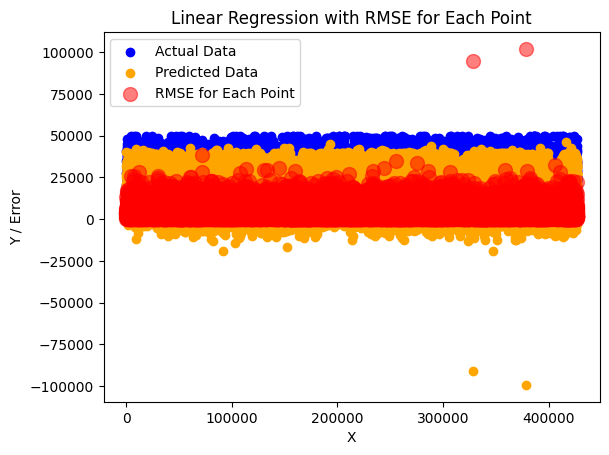

In [91]:
print("Linear Regression : Best parameters:", best_params)
print("Linear Regression : Mean Squared Error and Root Mean Square Error:", mse_linear, np.sqrt(mse_linear))

#X_test = X_test.reset_index()
# Scatter plot of actual data
plt.scatter(X_test.index, y_test, label='Actual Data', color='blue')
# Line plot for predicted data
plt.scatter(X_test.index, y_pred_linear, label='Predicted Data', color='orange')
# Scatter plot of RMSE values
plt.scatter(X_test.index, point_rmse_linear, label='RMSE for Each Point', color='red', s=100, alpha=0.5)

plt.xlabel("X")
plt.ylabel("Y / Error")
plt.title("Linear Regression with RMSE for Each Point")
plt.legend()
plt.show()

Lasso Regression : Best parameters : {'lasso__alpha': 5}
Lasso Regression : Mean Squared Error & Root Mean Square Error, R2 Score 33220725.05893689 5763.742279017764 0.7522001973363391


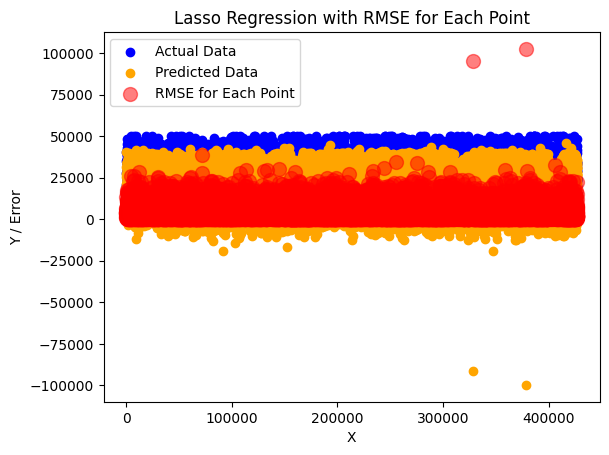

In [92]:
print("Lasso Regression : Best parameters :", best_params_lasso)
print("Lasso Regression : Mean Squared Error & Root Mean Square Error, R2 Score", mse_lasso, np.sqrt(mse_lasso), r2)

#X_test = X_test.reset_index()
# Scatter plot of actual data
plt.scatter(X_test.index, y_test, label='Actual Data', color='blue')
# Line plot for predicted data
plt.scatter(X_test.index, y_pred_lasso, label='Predicted Data', color='orange')
# Scatter plot of RMSE values
plt.scatter(X_test.index, point_rmse_lasso, label='RMSE for Each Point', color='red', s=100, alpha=0.5)

plt.xlabel("X")
plt.ylabel("Y / Error")
plt.title("Lasso Regression with RMSE for Each Point")
plt.legend()
plt.show()

PCA Based Linear Regression : Mean Squared Error =  41708140.334748656 

PCA Based Linear Regression : Root Mean Squared Error =  6458.183981178351 



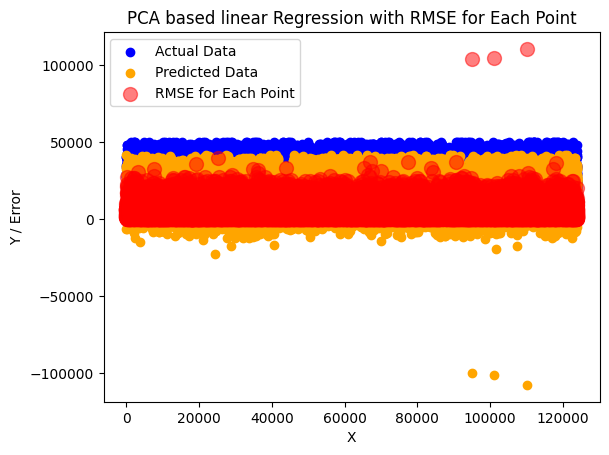

In [93]:
print("PCA Based Linear Regression : Mean Squared Error = ", pca_mse, "\n")
print("PCA Based Linear Regression : Root Mean Squared Error = ", overall_pca_rmse, "\n")

#X_test = X_test.reset_index()
# Scatter plot of actual data
plt.scatter(Xpca_test.index, ypca_test, label='Actual Data', color='blue')
# Line plot for predicted data
plt.scatter(Xpca_test.index, ypca_pred, label='Predicted Data', color='orange')
# Scatter plot of RMSE values
plt.scatter(Xpca_test.index, pointpca_rmse, label='RMSE for Each Point', color='red', s=100, alpha=0.5)

plt.xlabel("X")
plt.ylabel("Y / Error")
plt.title("PCA based linear Regression with RMSE for Each Point")
plt.legend()
plt.show()

Permutation Importance:
year: 0.6956 +/- 0.0046
fuel_diesel: 0.0591 +/- 0.0010
transmission_other: 0.0430 +/- 0.0010
cylinders_8 cylinders: 0.0395 +/- 0.0007
cylinders_4 cylinders: 0.0378 +/- 0.0009
drive_fwd: 0.0265 +/- 0.0005
odometer: 0.0180 +/- 0.0006
transmission_automatic: 0.0144 +/- 0.0007
type_truck: 0.0125 +/- 0.0004
type_sedan: 0.0105 +/- 0.0003
manufacturer_toyota: 0.0087 +/- 0.0005
type_convertible: 0.0062 +/- 0.0004
cylinders_10 cylinders: 0.0054 +/- 0.0004
type_SUV: 0.0044 +/- 0.0003
manufacturer_lexus: 0.0038 +/- 0.0003
type_coupe: 0.0037 +/- 0.0003
manufacturer_nissan: 0.0035 +/- 0.0002
type_pickup: 0.0033 +/- 0.0003
title_status_clean: 0.0026 +/- 0.0002
manufacturer_dodge: 0.0025 +/- 0.0002
condition_fair: 0.0021 +/- 0.0003
manufacturer_porsche: 0.0020 +/- 0.0002
manufacturer_chrysler: 0.0018 +/- 0.0002
condition_like new: 0.0018 +/- 0.0001
manufacturer_ford: 0.0017 +/- 0.0001
manufacturer_kia: 0.0016 +/- 0.0001
type_hatchback: 0.0015 +/- 0.0002
manufacturer_hyundai: 0

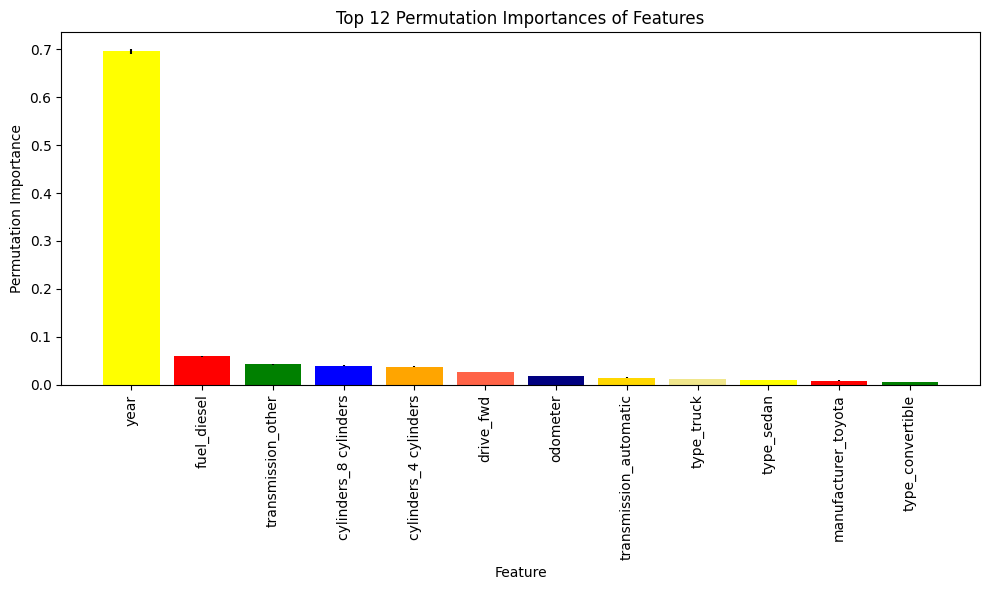

In [94]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(best_model_lasso, X_test, y_test, n_repeats=10, random_state=42)

# Get feature names
feature_names = X_test.columns

# Sort features by their importance
sorted_indices = perm_importance.importances_mean.argsort()[::-1]

# Print the permutation importance of each feature
print("Permutation Importance:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {perm_importance.importances_mean[idx]:.4f} +/- {perm_importance.importances_std[idx]:.4f}")


# Plot the permutation importance of top N features
N = 12  # Number of top features to plot
top_feature_indices = sorted_indices[:N]
top_feature_names = [feature_names[idx] for idx in top_feature_indices]
top_importances = perm_importance.importances_mean[top_feature_indices]

colors = ['Yellow', 'red', 'green', 'blue', 'orange', 'tomato', 'navy', 'gold', 'khaki']
plt.figure(figsize=(10, 6))
plt.bar(range(N), top_importances, yerr=perm_importance.importances_std[top_feature_indices], color=colors)
plt.xticks(range(N), top_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title(f'Top {N} Permutation Importances of Features')
plt.tight_layout()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.


**Report to Car Dealers**

We have deveoped a model that will estimate the price of the car based on the features of the car. While using this model, it is important for the car dealers to try to get accurate information about the features of the car;

Please note the following specific features as they determine the car price in the order of importance:

(1) Year of production

(2) Manufacturer

(3) Drive

(4) # of Cylinders

(5) Fuel type

(6) Odometer

(7) Type of Car


**Recliberating the inventory prices** : If the dealers have inventory, we recommend collecting above information for the existing inventory and validate the car price provided by our tool vs the currently tagged car price.

Note : The estimated deviation in the car price with the provided model could be approx ~5K in worst case. Such deviation could occur if the above information is not collected accurately.

**Attention to features while aquiring cars** : Pay special attention to cars mileage, year of production and rest of the features listed above while aquring the car in the inventory. These features are significant predictors of pricing. Maintaining a diverse range of cars concerning these features can cater to broader consumer preferences.

**Tracking Trends** : Regularly provide us with the actual sale data so that we provide the updated models. Such data feed to us will help track trends ex: electric vehicles getting sold at higher price that listed would tell us that the fuel type is gaining higher improtance than other features.

In [95]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import SequentialFeatureSelector

# Create a base model (Logistic Regression)
#Lmodel = LogisticRegression(max_iter=400)

# Apply Sequential Feature Selector (Forward Selection, select 2 features)
#sfs = SequentialFeatureSelector(Lmodel, n_features_to_select=3, direction='forward', scoring='accuracy')
#sfs.fit(X_train, y_train)

# Get the selected features
#selected_features = df.columns[sfs.get_support()]

#print("Selected features using Sequential Forward Selection:")
#print(selected_features)

# Train the model with selected features
#model.fit(X_train[selected_features], y_train)

# Test the model with selected features
#accuracy = Lmodel.score(X_test[selected_features], y_test)
#print("Model accuracy with selected features:", accuracy)